In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import deeplake

C:\Users\ahmed\anaconda3\envs\neuralnetwork\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.1.0) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [4]:
# Load dataset using DeepLake
train = deeplake.load("hub://activeloop/gtsrb-train")
test = deeplake.load("hub://activeloop/gtsrb-test")

# Extract data and labels
import cv2

# Function to preprocess data
def preprocess_data(ds, target_size=(32, 32)):
    # Resize all images to the target size
    images = np.array([cv2.resize(np.array(img), target_size) for img in ds.images.numpy(aslist=True)], dtype=np.float32)
    labels = np.array([lbl for lbl in ds.labels.numpy(aslist=True)], dtype=np.int32)
    return images / 255.0, to_categorical(labels)

# Preprocess the training and testing datasets
X_train, y_train = preprocess_data(train)
X_test, y_test = preprocess_data(test)

print(f"Training Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels Shape: {y_test.shape}")

/

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtsrb-train



/

hub://activeloop/gtsrb-train loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtsrb-test



/

hub://activeloop/gtsrb-test loaded successfully.



Training Data Shape: (39209, 32, 32, 3), Labels Shape: (39209, 43)
Testing Data Shape: (7357, 32, 32, 3), Labels Shape: (7357, 43)


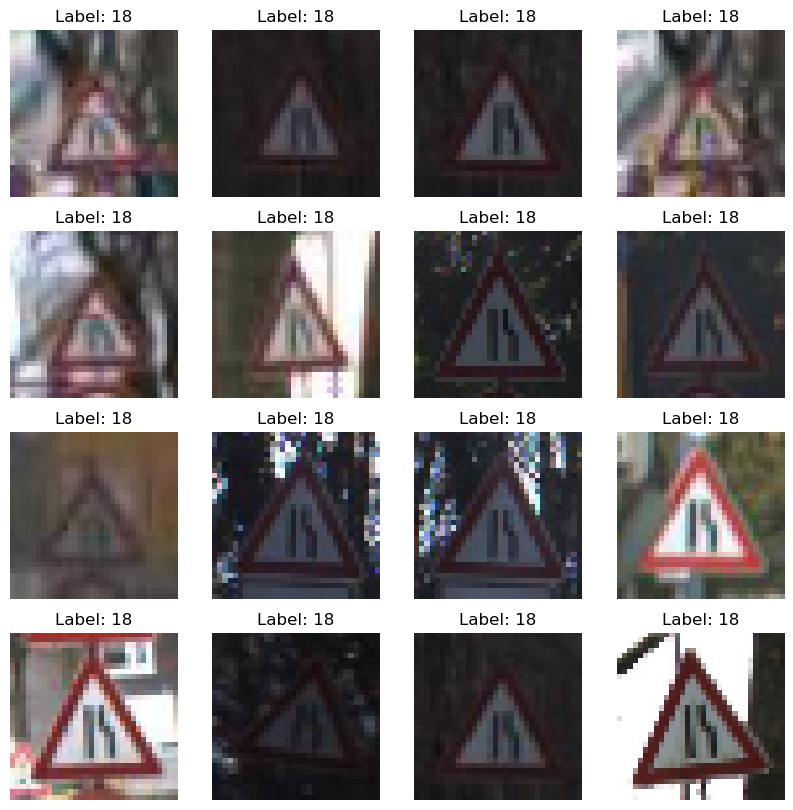

In [5]:
# Visualize some images with their labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

In [6]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/10
981/981 [==============================] - 210s 214ms/step - loss: 0.8473 - accuracy: 0.7329 - val_loss: 19.2651 - val_accuracy: 0.0473
Epoch 2/10
981/981 [==============================] - 210s 214ms/step - loss: 0.4011 - accuracy: 0.8715 - val_loss: 22.7407 - val_accuracy: 0.0474
Epoch 3/10
981/981 [==============================] - 209s 214ms/step - loss: 0.2805 - accuracy: 0.9107 - val_loss: 24.3501 - val_accuracy: 0.0471
Epoch 4/10
981/981 [==============================] - 203s 207ms/step - loss: 0.2155 - accuracy: 0.9303 - val_loss: 26.6374 - val_accuracy: 0.0472
Epoch 5/10
981/981 [==============================] - 199s 203ms/step - loss: 0.1762 - accuracy: 0.9448 - val_loss: 25.8263 - val_accuracy: 0.0474
Epoch 6/10
981/981 [==============================] - 201s 205ms/step - loss: 0.1495 - accuracy: 0.9518 - val_loss: 32.0949 - val_accuracy: 0.0473
Epoch 7/10
981/981 [==============================] - 206s 210ms/step - loss: 0.1244 - accuracy: 0.9590 - val_loss: 33

In [9]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

230/230 - 14s - loss: 7.3255 - accuracy: 0.7677 - 14s/epoch - 59ms/step
Test Accuracy: 76.77%
230/230 [==============================] - 14s 61ms/step
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       1.00      0.69      0.82        36
           2       0.92      0.99      0.95       422
           3       0.00      0.00      0.00       373
           4       0.89      0.96      0.92       250
           5       0.93      0.98      0.95       406
           6       0.99      1.00      0.99       395
           7       1.00      1.00      1.00       160
           8       0.92      1.00      0.96       122
           9       0.00      0.00      0.00        91
          10       1.00      0.87      0.93       207
          11       0.96      0.94      0.95       228
          12       0.88      1.00      0.94        38
          13       0.89      0.99      0.94       429
          14       0.57      1.00     

C:\Users\ahmed\anaconda3\envs\neuralnetwork\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\anaconda3\envs\neuralnetwork\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\anaconda3\envs\neuralnetwork\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

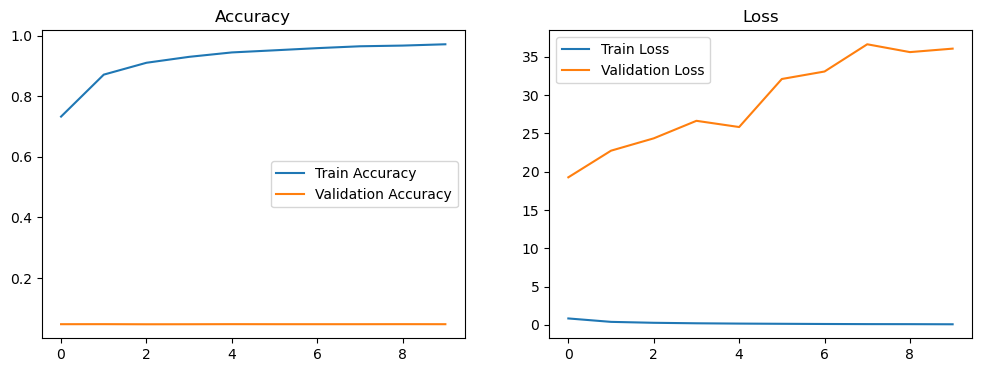

In [10]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [11]:
# Save the trained model
model.save('traffic_sign_recognition_model.h5')